In [1]:
import numpy as np
import pandas as pd
import tweepy as tw
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from textblob  import TextBlob


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
access_token='150566254-tMxSiqLPceECnBzOBgguOTTJCZh6dRax8jyZ07fN'  
access_token_secret='BJIyb3tKoKoC8rvlak6QkP6TFDLJyyNTSfB2GV2QsssUF'
consumer_key='TvZxIQ9ZgDuycTN7TQWOUx1bu'
consumer_secret='RJZA5oTMRktmbHSjisUXf2i2oTNTZsPcufzHkm3qSXZdJQtjZZ'  

In [0]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
public_tweets=api.home_timeline()
for tweet in public_tweets:
  print(tweet.text)

sample bhi2  tweet hi about using #python and #tweepy packages
sample bhi  tweet hi about using #python and #tweepy packages
sample bh  tweet hi about using #python and #tweepy packages
sample bhai  tweet hi about using #python and #tweepy packages
sample bhai  tweet hi about using #python and #tweepy packages
sample  tweet hi about using #python and #tweepy packages
sample  tweet about using #python and #tweepy packages
sample  tweet using #python and #tweepy packages
sample these tweet using #python and #tweepy packages
sample the tweet using #python and #tweepy packages
sample this tweet using #python and #tweepy packages
sample here  tweet using #python and #tweepy packages
sample tweet using #python and #tweepy packages
Technician - Soldering (IPC - 610 Certified) - Jobs, HITECH PLACEMENTS  https://t.co/Zt1Mz9thWv
Marketing Executive - Jobs, HITECH PLACEMENTS  https://t.co/LK2yUA4ebv
Dealer  -  NCFM  - Jobs, HITECH PLACEMENTS  https://t.co/cm2ww9AFUc
Purchase Executive - HVAC- Job

In [5]:
user=api.get_user('@andy')
print("user screen name")
print(user.screen_name)
print("user followers count")
print(user.followers_count)

user screen name
Andy
user followers count
2357443


In [6]:
for friend in user.friends():
  print(friend.screen_name)

mulaney
Kate_Chastain
marcshaiman
NYGovCuomo
AuschwitzMuseum
BillWeirCNN
dulcesloan
HawleyMO
ira
ihatejoelkim
karybrittingham
GarcelleB
frynaomifry
JerryOShow
AirMailWeekly
LeroneCO
braunwyn
MsJuneDiane
monchichi_marie
rgay


In [7]:
for followers in user.followers():
  print(followers.screen_name)

bmegan27gmailc1
chinta_crowder
leezamckelvie69
TaulbeeLewis
PhiloVance5
pal_lavender
SaraLCohen1
christi21466911
MsMariEtta
jakenicki
ReginaJ99283262
thunderandreign
janice69636598
deneisehoward
ycarey72
mottssauce
lisaschoonover9
ATLKellyG
Ruffcoins5
zeitler27


In [9]:
api.update_status("sample bhin  tweet hi about using #python and #tweepy packages")

Status(_api=<tweepy.api.API object at 0x7f458e740f60>, _json={'created_at': 'Mon May 04 13:50:27 +0000 2020', 'id': 1257306598726234114, 'id_str': '1257306598726234114', 'text': 'sample bhin  tweet hi about using #python and #tweepy packages', 'truncated': False, 'entities': {'hashtags': [{'text': 'python', 'indices': [34, 41]}, {'text': 'tweepy', 'indices': [46, 53]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://www.linkedin.com/in/anand-mohan-12668a21/" rel="nofollow">andyemb</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 150566254, 'id_str': '150566254', 'name': 'ANAND MOHAN', 'screen_name': 'ANAND_1979', 'location': 'NEW DELHI', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 10, 'friends_count': 2, 'listed_count': 0, 'created_at': 'Tue Jun 01 07:28:51

In [0]:
#PULL TWEETS BY SEARCH WORDS
tweets=tw.Cursor(api.search,q='ramayan-filter:retweets',lang="en",since='2019-04-01').items(1000)

In [12]:
tweets_text=[x.text for x in tweets]
tweets_text[0:20]

['Ramanand Sagar’s #Ramayan will air on #StarPlus from May 4 at 9.30 pm, while BR Chopra’s #Mahabharat has occupied t… https://t.co/yZbRjgmOok',
 'Frontline leadership!\nThis is @seethakkaMLA, ex-Naxal, ex-MLA, and state in-charge for Chattisgarh Mahila @INCIndia… https://t.co/dcu67sMZSR',
 'My mom just said, "aba ta ramayan herchas ki mahabharat herchas ki Bob Marley ko geet sunchas tero haat ma cha". Wh… https://t.co/LLHVZV97HZ',
 '90s Ramayan Maker Ramanand Sagar Great Grand Daughter Sakshi Chopra https://t.co/nLVHm0CwBR #mptop10 #bollywood_update #bollywod_news',
 '#Ramayan to start again from today in @StarPlus  channel at 7.30 P.M \n\n#RamayanOnStarPlus https://t.co/t42bhdXtbw',
 '#MEMES #memedaily\nIn this era of Netflix and Amazon prime..\nI need someone who can watch ramayan and mahabharat with me..',
 '@DDNational, Hey Doordash I want to say about that peoples was loving Ramayan of Ramanand Sagar. I also loved it to… https://t.co/MY5aoNDcsq',
 '@capt_amarinder  @punjabkesari 

In [0]:
#PULL TWEETS BY SEARCH WORDS
tweets=tw.Cursor(api.search,q='bigbasket-filter:retweets',lang="en",since='2019-04-01').items(1000)

In [14]:
tweets_text=[x.text for x in tweets]
tweets_text[0:20]

['@Shahid1827 Based on your post, we can not gauge exactly what went wrong. We request you to kindly elaborate your c… https://t.co/Ye3Xh5X03n',
 '@indian_tedmosby  As checked hope the order has been delivered. We request you to check and confirm.',
 'Are you delivering groceries in Lalbaug?\n@Grofers @BigBazaar @bigbasket_com @Flipkart @amazonIN',
 '@bigbasket_com Already emailed twice but there is no response.',
 '@Cosmo____Kramer    We certainly understand your concern, We request you to kindly spare us sometime. Our team will… https://t.co/WXiAjVcFn0',
 '@bigbasket_com I have not listen any thing from you. Please take the matter seriously because it is nothing else bu… https://t.co/gnz5yGny5R',
 'This is something I really want to highlight to everyone. It’s been more then three days I’m saying same issue to b… https://t.co/iWNwPXMHt7',
 '@bigbasket_com considered them to be pioneer(signing a superstar for their brand) in grocery/vegetable delivery ,bu… https://t.co/WzS8RsTXMB',
 '

In [15]:
len(tweets_text)

1000

In [16]:
print(tweets_text[0])
print(tweets_text[7])

@Shahid1827 Based on your post, we can not gauge exactly what went wrong. We request you to kindly elaborate your c… https://t.co/Ye3Xh5X03n
@bigbasket_com considered them to be pioneer(signing a superstar for their brand) in grocery/vegetable delivery ,bu… https://t.co/WzS8RsTXMB


In [0]:
#PULL TWEETS BY HASHTAGS
tweets=tw.Cursor(api.search,q='#miband4-filter:retweets',lang="en",since='2019-04-01').items(10)

In [18]:
tweets_text=[tweet.text for tweet in tweets]
tweets_text[0:20]

['Birthday gifts #JBLMSoundLiving  #mugs #table #MiBand4 https://t.co/ozeA9xTzPX',
 'Outdoor Wireless Waterproof Speaker With TF Function https://t.co/nd4tBYmby4\n$ and Free Shipping🛫\nTag a friend who… https://t.co/x27KbQUaHo',
 'The amount of data this band tries to give you is amazing! \n\n#MiBand4 https://t.co/kQGgbS0MWK',
 "New firmware update enables heart rate sharing on Mi Band 4 albeit region specific!\n\nStill can't believe Xiaomi rea… https://t.co/aFRokKtVvb",
 'VIDEO LINK:https://t.co/NuzOYPnTPc\n\n#Miband4 #unboxfreaker https://t.co/8Yoo7LfTIo',
 'Another gem from @Xiaomi &gt;&gt; 5 things to like about the Xiaomi Mi Band 4 Fitness tracker https://t.co/CMALOskSl5 via… https://t.co/C57R6SVkHE',
 'Bluetooth Smart Watch https://t.co/9Ulwp8zNvL\n$ 14.95 and Free Shipping🛫\nRetweet if you like this. 💞 Tap that Shop… https://t.co/MBqzS2A3j3',
 'This is as if time has just stopped.\n\n#picturethis365\n#picturethisclothing\n#timelessdesign #xiaomiglobal #miband4… https://t.co/GTFc

In [19]:
#FIND USER AND LOCATION INFO
tweets=tw.Cursor(api.search,q='#iphone-filter:retweets',lang="en",since='2019-04-01').items(1000)
users=[[tweet.user.screen_name,tweet.user.location] for  tweet in tweets]
users


[['CoolDealCA', 'United States'],
 ['Veescope', ''],
 ['inthekillhouse', 'Bucharest, Romania'],
 ['abylight', 'Barcelona'],
 ['studiovickn', 'Maringá, Brasil'],
 ['h0mez1', ''],
 ['Hk3ToN', 'France'],
 ['cpomagazine', ''],
 ['YasserM86', 'Somewhere on Earth'],
 ['c0nspirewme', 'Ontario, Canada'],
 ['CoolDealCA', 'United States'],
 ['xfragrance', 'Vancouver, British Columbia'],
 ['sthomasriley', ''],
 ['xfragrance', 'Vancouver, British Columbia'],
 ['OrdoNews', 'Worldwide'],
 ['iamAccounCHAN', 'Diliman, Quezon City'],
 ['Mobiradar1', 'Hyderabad, India'],
 ['MarketRealist', 'New York, NY'],
 ['Lotmobiles', 'India'],
 ['gadgetsdronix', ''],
 ['bearwitnessco', ''],
 ['EmeraldLordYT', ''],
 ['HOS_HouseOS', ''],
 ['AdamJMatlock', 'Houston, TX'],
 ['JTM22Tech', 'US'],
 ['QwikFone', 'London, England'],
 ['CanningCreation', 'Florida, USA'],
 ['swadelewis', 'Cumberland, MD']]

In [20]:
location=pd.DataFrame(data=users,columns=['screen_Name','location'])
location

,screen_Name,location
0,CoolDealCA,United States
1,Veescope,
2,inthekillhouse,"Bucharest, Romania"
3,abylight,Barcelona
4,studiovickn,"Maringá, Brasil"
5,h0mez1,
6,Hk3ToN,France
7,cpomagazine,
8,YasserM86,Somewhere on Earth
9,c0nspirewme,"Ontario, Canada"


In [0]:
tweets=tw.Cursor(api.search,q='india-economy-filter:retweets',lang="en",since='2019-04-01').items(1000)
tweets_text=[tweet.text for tweet in tweets]

In [11]:
len(tweets_text)
tweets_text[0:5]

['There are a lot of reasons to be optimistic on India. Young population, high savings rate, low debt, &amp; talented wor… https://t.co/ku2Std4D52',
 'Represented India at the meeting of #G20 Digital Economy Ministers held through video conferencing to discuss the c… https://t.co/RgndWJRZB8',
 'Represented India at the meeting of #G20 Digital Economy Ministers held through video conferencing to discuss the c… https://t.co/UIAYV7zmaz',
 '@SanjayKiran2 @Unknown_Offl @aditi1231 @CMOTamilNadu TN border edhukku ? TN laiye May 7th open panraanga official n… https://t.co/RrHvlIU1S4',
 'Represented India at the meeting of #G20 Digital Economy Ministers held through video conferencing to discuss the c… https://t.co/tLFMxg8k4S']

In [12]:
tweets_df=pd.DataFrame(tweets_text,columns=["tweets"])
tweets_df.head()


,tweets
0,There are a lot of reasons to be optimistic on...
1,Represented India at the meeting of #G20 Digit...
2,Represented India at the meeting of #G20 Digit...
3,@SanjayKiran2 @Unknown_Offl @aditi1231 @CMOTam...
4,Represented India at the meeting of #G20 Digit...


In [0]:
tweets_df.to_csv("tweets.csv")

In [0]:
corpus=[] #form an empty list called corpus
ps=PorterStemmer() #for stemming the words to original form ,for example running to run
stop_words=set(stopwords.words("english"))#remove words such as will,I,and ,at etc.
for i in range(0,1000): #iterate through the list of 1000 tweets
  tweets_text_cln=re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]",' ',tweets_text[i])
  tweets_text_cln=tweets_text_cln.lower()
  tweets_text_cln=tweets_text_cln.split()
  tweets_text_cln=[x for x in tweets_text_cln if not x in stop_words]
  tweets_text_cln=" ".join(tweets_text_cln)
  corpus.append(tweets_text_cln)

In [15]:
corpus[0:5]

['lot reasons optimistic india young population high savings rate low debt amp talented wor',
 'represented india meeting g digital economy ministers held video conferencing discuss c',
 'represented india meeting g digital economy ministers held video conferencing discuss c',
 'offl tn border edhukku tn laiye may th open panraanga official n',
 'represented india meeting g digital economy ministers held video conferencing discuss c']

In [28]:
bagofwords=[]
for i in range(0,1000):
  words=corpus[i].split()
  bagofwords.append(words)
bagofwords[0:5]

[['lot',
  'reasons',
  'optimistic',
  'india',
  'young',
  'population',
  'high',
  'savings',
  'rate',
  'low',
  'debt',
  'amp',
  'talented',
  'wor'],
 ['represented',
  'india',
  'meeting',
  'g',
  'digital',
  'economy',
  'ministers',
  'held',
  'video',
  'conferencing',
  'discuss',
  'c'],
 ['represented',
  'india',
  'meeting',
  'g',
  'digital',
  'economy',
  'ministers',
  'held',
  'video',
  'conferencing',
  'discuss',
  'c'],
 ['offl',
  'tn',
  'border',
  'edhukku',
  'tn',
  'laiye',
  'may',
  'th',
  'open',
  'panraanga',
  'official',
  'n'],
 ['represented',
  'india',
  'meeting',
  'g',
  'digital',
  'economy',
  'ministers',
  'held',
  'video',
  'conferencing',
  'discuss',
  'c']]

In [29]:
all_words=list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print("most commonly occuring words abd frequency\n")
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

['lot', 'reasons', 'optimistic', 'india', 'young', 'population', 'high', 'savings', 'rate', 'low']

most commonly occuring words abd frequency



[('india', 660),
 ('economy', 432),
 ('lockdown', 106),
 ('china', 99),
 ('indian', 79),
 ('liquor', 76),
 ('land', 70),
 ('people', 65),
 ('amp', 61),
 ('covid', 60),
 ('economic', 60),
 ('size', 56),
 ('offers', 56),
 ('twice', 55),
 ('luxembourg', 54),
 ('firms', 53),
 ('via', 53),
 ('leaving', 51),
 ('shops', 49),
 ('liquorshops', 42)]

In [0]:
words_to_remove=['india','economy','indian','much','amp']

In [32]:
bagofwords_new=[[x for x in word if not x in words_to_remove]for word in bagofwords]
bagofwords_new[0:5]

[['lot',
  'reasons',
  'optimistic',
  'young',
  'population',
  'high',
  'savings',
  'rate',
  'low',
  'debt',
  'talented',
  'wor'],
 ['represented',
  'meeting',
  'g',
  'digital',
  'ministers',
  'held',
  'video',
  'conferencing',
  'discuss',
  'c'],
 ['represented',
  'meeting',
  'g',
  'digital',
  'ministers',
  'held',
  'video',
  'conferencing',
  'discuss',
  'c'],
 ['offl',
  'tn',
  'border',
  'edhukku',
  'tn',
  'laiye',
  'may',
  'th',
  'open',
  'panraanga',
  'official',
  'n'],
 ['represented',
  'meeting',
  'g',
  'digital',
  'ministers',
  'held',
  'video',
  'conferencing',
  'discuss',
  'c']]

In [33]:
all_words=list(itertools.chain(*bagofwords_new))
print(all_words[0:10])
print()
print("MOST COMMONLY OCCURING WORDS AND FREQUENCY\n")
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

['lot', 'reasons', 'optimistic', 'young', 'population', 'high', 'savings', 'rate', 'low', 'debt']

MOST COMMONLY OCCURING WORDS AND FREQUENCY



[('lockdown', 106),
 ('china', 99),
 ('liquor', 76),
 ('land', 70),
 ('people', 65),
 ('covid', 60),
 ('economic', 60),
 ('size', 56),
 ('offers', 56),
 ('twice', 55),
 ('luxembourg', 54),
 ('firms', 53),
 ('via', 53),
 ('leaving', 51),
 ('shops', 49),
 ('liquorshops', 42),
 ('govt', 42),
 ('world', 39),
 ('government', 38),
 ('today', 38)]

In [34]:
freq_word_df=pd.DataFrame(words_freq.most_common(20),columns=['words','freq'])
freq_word_df.head()

,words,freq
0,lockdown,106
1,china,99
2,liquor,76
3,land,70
4,people,65


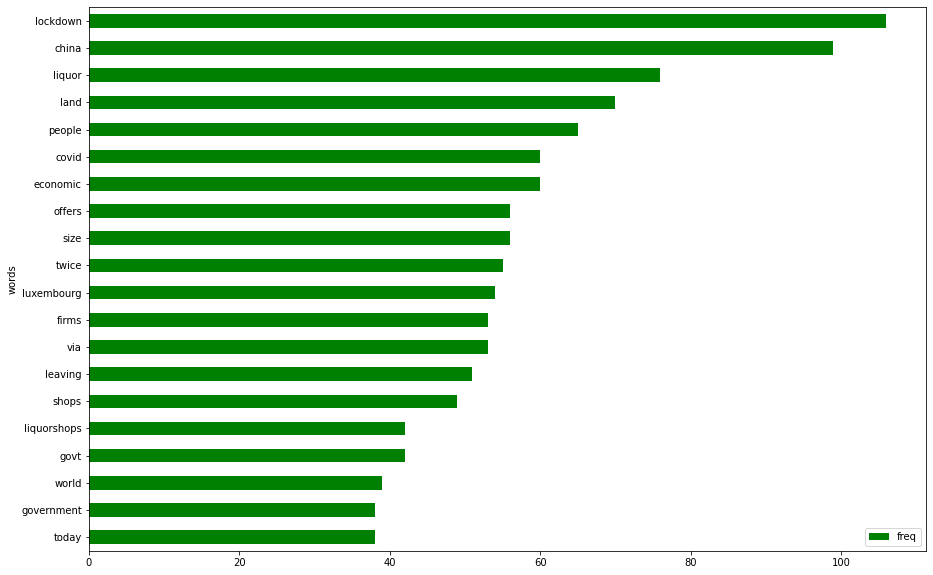

In [35]:
fig,ax=plt.subplots(figsize=(15,10))
freq_word_df.sort_values(by='freq').plot.barh(x='words',y='freq',ax=ax,color='green')
plt.show()

In [0]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
word_string=" ".join(freq_word_df.words)
wordcloud=WordCloud(stopwords=STOPWORDS,background_color='black',max_words=50).generate(word_string)

In [42]:
plt.figure(figsize=(25,50))
plt.clf()

<Figure size 1800x3600 with 0 Axes>

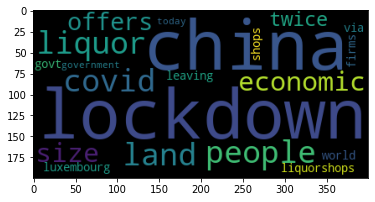

In [43]:
plt.imshow(wordcloud)

In [44]:
!jupyter nbconvert MODULE5_DAY3_TWEETER_TEXT_ANALYSIS_TWEEPY_PKG.ipynb

[NbConvertApp] Converting notebook MODULE5_DAY3_TWEETER_TEXT_ANALYSIS_TWEEPY_PKG.ipynb to html
[NbConvertApp] Writing 425606 bytes to MODULE5_DAY3_TWEETER_TEXT_ANALYSIS_TWEEPY_PKG.html
